# Latin America & Caribbean Analysis 

## Graph and interperate percentage change and difference by year

In [41]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import os
from pprint import pprint
import requests
import json
import html
from scipy.stats import linregress
import statsmodels.api as sm
import seaborn as sns

In [42]:
csv_merge = "../Resources/newmerge_1416.csv"
df_1416 = pd.read_csv(csv_merge)

In [43]:
df_1416.columns

Index(['Region_2014', 'ISO', 'ODB-Rank_2014', 'Country',
       'ODB-Score-Scaled_2014', 'Readiness-Scaled_2014',
       'Implementation-Innovation-Scaled_2014',
       'Implementation-Social-Scaled_2014',
       'Implementation-Accountability-Scaled_2014', 'Implementation-Rank_2014',
       'Impact-Political-Scaled_2014', 'Impact-Social-Scaled_2014',
       'Impact-Economic-Scaled_2014', 'Impact-Rank_2014', 'Cluster-Group',
       'E-Government Rank_2014', 'E-Government Index_2014',
       'E-Participation Index_2014', 'Online Service Index_2014',
       'Human Capital Index_2014',
       'Telecommunication Infrastructure Index_2014', 'ODB-Score-Scaled_2016',
       'Readiness-Scaled_2016', 'Implementation-Innovation-Scaled_2016',
       'Implementation-Social-Scaled_2016',
       'Implementation-Accountability-Scaled_2016', 'Implementation-Rank_2016',
       'Impact-Political-Scaled_2016', 'Impact-Social-Scaled_2016',
       'Impact-Economic-Scaled_2016', 'Impact-Rank_2016',
       '

## ODB Score Scaled

In [44]:
df_1416_odbscore = df_1416[['Country', 'Region_2014', "ODB-Score-Scaled_2014", "ODB-Score-Scaled_2016"]]
df_1416_odbscore = df_1416_odbscore[df_1416_odbscore['Region_2014'] == 'Latin America & Caribbean']
df_1416_odbscore = df_1416_odbscore.reset_index(drop = True)

### Calculating Percentage Change 

In [45]:
df_1416_per = df_1416_odbscore[["ODB-Score-Scaled_2014", "ODB-Score-Scaled_2016"]]
df_1416_per.head()

,ODB-Score-Scaled_2014,ODB-Score-Scaled_2016
0,58.70,47.41
1,52.13,58.86
2,50.09,73.45
3,49.37,60.85
4,37.74,33.33


In [46]:
percentage = df_1416_per.pct_change(axis=1)

In [47]:
percentage = round(percentage * 100,2)
percentage_2016 = percentage["ODB-Score-Scaled_2016"].values.tolist()
percentage_2016

[-19.23,
 12.91,
 46.64,
 23.25,
 -11.69,
 5.04,
 -38.28,
 59.51,
 -36.44,
 40.71,
 -6.67,
 426.89]

In [48]:
df_1416_odbscore.insert(4, "Percentage Change", percentage_2016, True)

In [49]:
df_1416_odbscore

,Country,Region_2014,ODB-Score-Scaled_2014,ODB-Score-Scaled_2016,Percentage Change
0,Chile,Latin America & Caribbean,58.70,47.41,-19.23
1,Brazil,Latin America & Caribbean,52.13,58.86,12.91
2,Mexico,Latin America & Caribbean,50.09,73.45,46.64
3,Uruguay,Latin America & Caribbean,49.37,60.85,23.25
4,Peru,Latin America & Caribbean,37.74,33.33,-11.69
5,Argentina,Latin America & Caribbean,35.71,37.51,5.04
6,Ecuador,Latin America & Caribbean,35.03,21.62,-38.28
7,Colombia,Latin America & Caribbean,32.38,51.65,59.51
8,Costa Rica,Latin America & Caribbean,31.26,19.87,-36.44
9,Jamaica,Latin America & Caribbean,26.26,36.95,40.71


In [50]:
#Add graphing at the end

### Calculating Difference of Years

In [51]:
df_1416_odbscore["Difference"] = df_1416_odbscore["ODB-Score-Scaled_2016"].sub(df_1416_odbscore["ODB-Score-Scaled_2014"],axis=0)

In [52]:
df_1416_odbscore
#Format chart below % and rounded decimal points.

,Country,Region_2014,ODB-Score-Scaled_2014,ODB-Score-Scaled_2016,Percentage Change,Difference
0,Chile,Latin America & Caribbean,58.70,47.41,-19.23,-11.29
1,Brazil,Latin America & Caribbean,52.13,58.86,12.91,6.73
2,Mexico,Latin America & Caribbean,50.09,73.45,46.64,23.36
3,Uruguay,Latin America & Caribbean,49.37,60.85,23.25,11.48
4,Peru,Latin America & Caribbean,37.74,33.33,-11.69,-4.41
5,Argentina,Latin America & Caribbean,35.71,37.51,5.04,1.80
6,Ecuador,Latin America & Caribbean,35.03,21.62,-38.28,-13.41
7,Colombia,Latin America & Caribbean,32.38,51.65,59.51,19.27
8,Costa Rica,Latin America & Caribbean,31.26,19.87,-36.44,-11.39
9,Jamaica,Latin America & Caribbean,26.26,36.95,40.71,10.69


### Graphing

#### 'Percentage Change' Bar Graph

In [53]:
df_1416_odbscore = df_1416_odbscore.sort_values(by="Percentage Change")
df_1416_odbscore = df_1416_odbscore.reset_index(drop=True)

x_axis = df_1416_odbscore["Country"]
y_axis = df_1416_odbscore["Percentage Change"]

def addlabels(x_axis,y_axis):
    for i, label in enumerate(df_1416_odbscore['Country']):
        plt.text(x_axis[i], y_axis[i]+1,label, size=11, ha='center', va='center')


def weather_graphing(x_axis, y_axis, title, xlabel, ylabel):
    #graphing
    plt.figure(figsize=(20,10))
    #The line below is for seaborn
    sns.barplot(x = x_axis, y = y_axis, data = df_1416_odbscore, dodge=False)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation=90)
    plt.grid()
    addlabels(x_axis, y_axis)

In [54]:
# df_1416_odbscore = df_1416_odbscore.sort_values(by="Percentage Change")
# df_1416_odbscore = df_1416_odbscore.reset_index(drop=True)
# x_axis = df_1416_odbscore["Country"]
# y_axis = df_1416_odbscore["Percentage Change"]


# for i, label in enumerate(df_1416_odbscore['Country']):
#     plt.text(x_axis[i], y_axis[i]+1,label, size=11, ha='center', va='center')


# def weather_graphing(x_axis, y_axis, title, xlabel, ylabel):
#     #graphing
#     plt.figure(figsize=(20,10))
#     #The line below is for seaborn
#     sns.barplot(x = x_axis, y = y_axis, data = df_1416_odbscore, dodge=False)
#     plt.xlabel(xlabel)
#     plt.ylabel(ylabel)
#     plt.title(title)
#     plt.xticks(rotation=90)
#     plt.grid()
# #     addlabels(x_axis, y_axis)

In [55]:
weather_graphing(x_axis, y_axis, "Open Data Barometer Score Percentage Change", "Country", "Percentage Change (%)")
sns.set_style('darkgrid')

ConversionError: Failed to convert value(s) to axis units: 'Ecuador'

<Figure size 1440x720 with 1 Axes>

#### Stacked bar graph ODB Score 2014 and Difference

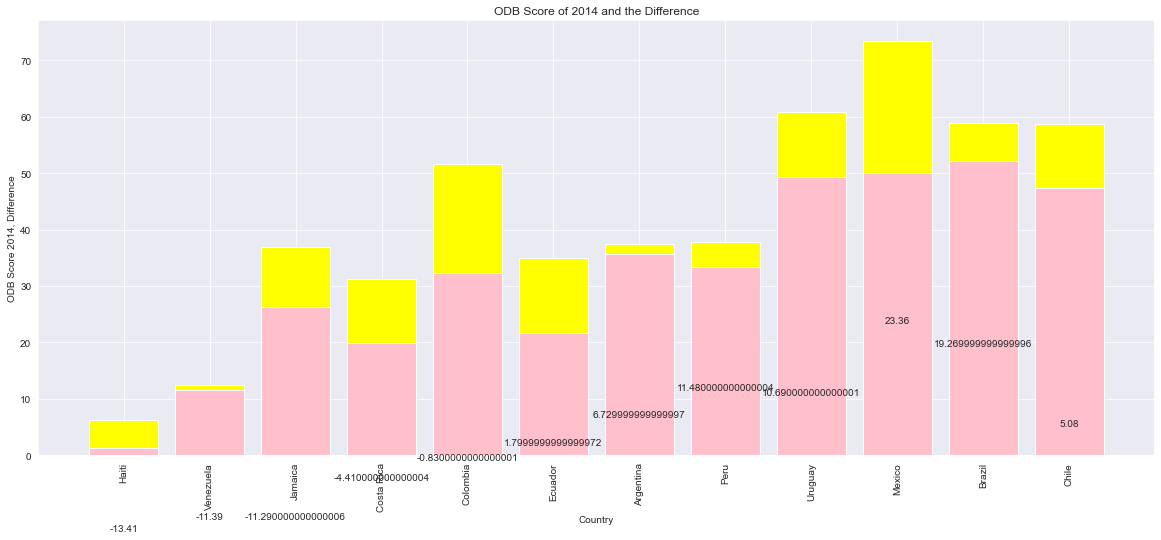

In [56]:
df_1416_odbscore = df_1416_odbscore.sort_values(by="ODB-Score-Scaled_2014")

def addlabels(x,y2):
    for i in range(len(x)):
        plt.text(i, y2[i], y2[i], ha = 'center')

# create data
x = df_1416_odbscore["Country"]
y1 = df_1416_odbscore["ODB-Score-Scaled_2014"]
y2 = df_1416_odbscore['Difference']
plt.figure(figsize=(20,8))
# plot bars in stack manner
plt.bar(x, y1, color='pink')
plt.bar(x, y2, bottom=y1, color='yellow')
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("ODB Score 2014, Difference")
plt.title("ODB Score of 2014 and the Difference")
addlabels(x, y2)
plt.show()

## E-Government Index

In [57]:
df_1416_egov = df_1416[['Country', 'Region_2014', 'E-Government Index_2014', 'E-Government Index_2016']]
df_1416_egov = df_1416_egov[df_1416_egov['Region_2014'] == 'Latin America & Caribbean']
df_1416_egov = df_1416_egov.reset_index(drop = True)

### Calculating Percentage Change 

In [58]:
df_egov_per = df_1416_egov[['E-Government Index_2014', 'E-Government Index_2016']]
df_egov_per.head()

,E-Government Index_2014,E-Government Index_2016
0,0.71216,0.69492
1,0.60082,0.63769
2,0.57330,0.61953
3,0.74195,0.72367
4,0.54354,0.53815


In [59]:
percentage = df_egov_per.pct_change(axis=1)
percentage = round(percentage * 100,2)
percentage_2016 = percentage["E-Government Index_2016"].values.tolist()
percentage_2016

[-2.42, 6.14, 8.06, -2.46, -0.99, 10.66, 11.33, 1.04, 4.17, 3.32, -7.83, 6.79]

In [60]:
df_1416_egov.insert(4, "Percentage Change", percentage_2016, True)

In [61]:
df_1416_egov

,Country,Region_2014,E-Government Index_2014,E-Government Index_2016,Percentage Change
0,Chile,Latin America & Caribbean,0.71216,0.69492,-2.42
1,Brazil,Latin America & Caribbean,0.60082,0.63769,6.14
2,Mexico,Latin America & Caribbean,0.57330,0.61953,8.06
3,Uruguay,Latin America & Caribbean,0.74195,0.72367,-2.46
4,Peru,Latin America & Caribbean,0.54354,0.53815,-0.99
5,Argentina,Latin America & Caribbean,0.63059,0.69780,10.66
6,Ecuador,Latin America & Caribbean,0.50529,0.56254,11.33
7,Colombia,Latin America & Caribbean,0.61730,0.62371,1.04
8,Costa Rica,Latin America & Caribbean,0.60614,0.63142,4.17
9,Jamaica,Latin America & Caribbean,0.43882,0.45340,3.32


### Calculating Difference of Years

In [62]:
df_1416_egov["Difference"] = df_1416_egov["E-Government Index_2016"].sub(df_1416_egov["E-Government Index_2014"],axis=0)

In [63]:
df_1416_egov
#Format chart below % and rounded decimal points.

,Country,Region_2014,E-Government Index_2014,E-Government Index_2016,Percentage Change,Difference
0,Chile,Latin America & Caribbean,0.71216,0.69492,-2.42,-0.01724
1,Brazil,Latin America & Caribbean,0.60082,0.63769,6.14,0.03687
2,Mexico,Latin America & Caribbean,0.57330,0.61953,8.06,0.04623
3,Uruguay,Latin America & Caribbean,0.74195,0.72367,-2.46,-0.01828
4,Peru,Latin America & Caribbean,0.54354,0.53815,-0.99,-0.00539
5,Argentina,Latin America & Caribbean,0.63059,0.69780,10.66,0.06721
6,Ecuador,Latin America & Caribbean,0.50529,0.56254,11.33,0.05725
7,Colombia,Latin America & Caribbean,0.61730,0.62371,1.04,0.00641
8,Costa Rica,Latin America & Caribbean,0.60614,0.63142,4.17,0.02528
9,Jamaica,Latin America & Caribbean,0.43882,0.45340,3.32,0.01458


### Graphing

#### 'Percentage Change' Bar Graph

In [64]:
df_1416_egov = df_1416_egov.sort_values(by="Percentage Change")
df_1416_egov = df_1416_egov.reset_index(drop=True)
x_axis = df_1416_egov["Country"]
y_axis = df_1416_egov["Percentage Change"]


for i, label in enumerate(df_1416_odbscore['Country']):
    plt.text(x_axis[i], y_axis[i]+1,label, size=11, ha='center', va='center')


def weather_graphing(x_axis, y_axis, title, xlabel, ylabel):
    #graphing
    plt.figure(figsize=(20,10))
    #The line below is for seaborn
    sns.barplot(x = x_axis, y = y_axis, data = df_1416_egov, dodge=False)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation=90)
    plt.grid()
    addlabels(x_axis, y_axis)

ConversionError: Failed to convert value(s) to axis units: 'Venezuela'

<Figure size 432x288 with 1 Axes>

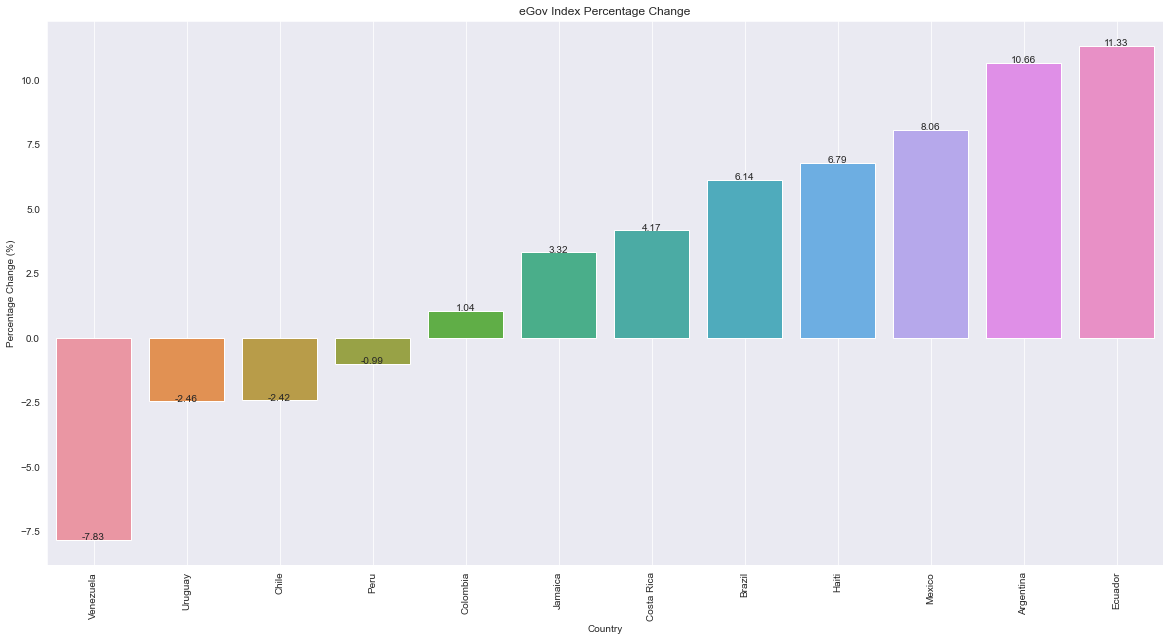

In [65]:
weather_graphing(x_axis, y_axis, "eGov Index Percentage Change", "Country", "Percentage Change (%)")
sns.set_style('darkgrid')

#### Stacked bar graph ODB Score 2014 and Difference

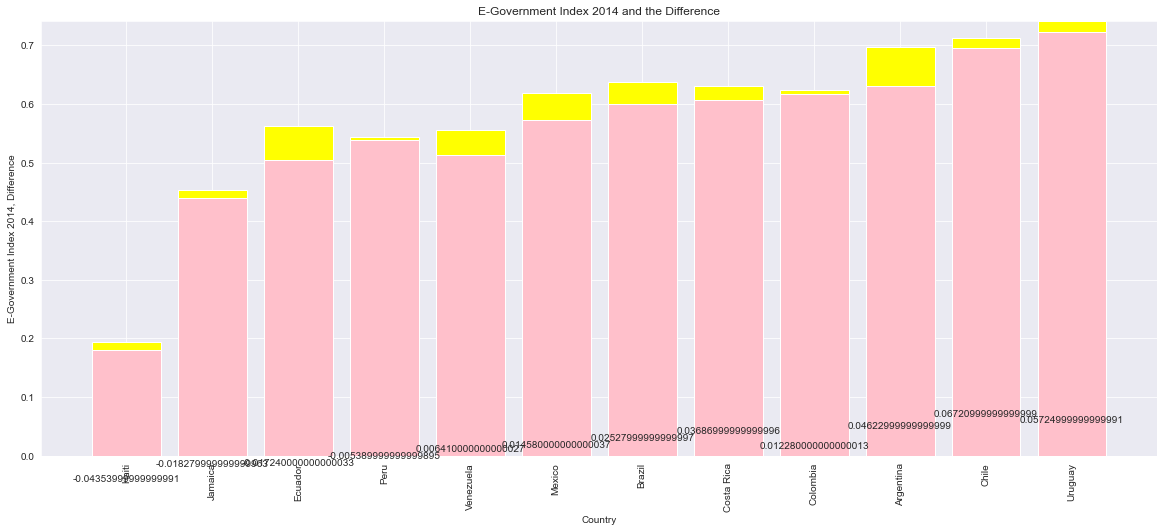

In [66]:
df_1416_egov = df_1416_egov.sort_values(by="E-Government Index_2014")

def addlabels(x,y2):
    for i in range(len(x)):
        plt.text(i, y2[i], y2[i], ha = 'center')

# create data
x = df_1416_egov["Country"]
y1 = df_1416_egov["E-Government Index_2014"]
y2 = df_1416_egov['Difference']
plt.figure(figsize=(20,8))
# plot bars in stack manner
plt.bar(x, y1, color='pink')
plt.bar(x, y2, bottom=y1, color='yellow')
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("E-Government Index 2014, Difference")
plt.title("E-Government Index 2014 and the Difference")
addlabels(x, y2)
plt.show()

## Human Capital 

In [67]:
# df_1416_hucap = df_1416[['Country', 'Region_2014', 'Human Capital Index_2014', 'Human Capital Index_2016']]
# df_1416_hucap = df_1416_hucap[df_1416_hucap['Region_2014'] == 'Latin America & Caribbean']
# df_1416_hucap = df_1416_hucap.reset_index(drop = True)

### Calculating Percentage Change 

In [68]:
# df_cap_per = df_1416_hucap[['Human Capital Index_2014', 'Human Capital Index_2016']]
# df_cap_per.head()

In [69]:
# percentage = df_cap_per.pct_change(axis=1)
# percentage = round(percentage * 100,2)
# percentage_2016 = percentage["Human Capital Index_2016"].values.tolist()
# percentage_2016

In [70]:
# df_1416_hucap.insert(4, "Percentage Change", percentage_2016, True)

In [71]:
# df_1416_hucap

### Calculating Difference of Years

In [72]:
# df_1416_hucap["Difference"] = df_1416_hucap["Human Capital Index_2016"].sub(df_1416_hucap["Human Capital Index_2014"],axis=0)

In [73]:
# df_1416_hucap
# #Format chart below % and rounded decimal points.

### Graphing

#### 'Percentage Change' Bar Graph

In [74]:
# df_1416_hucap = df_1416_hucap.sort_values(by="Percentage Change", ascending=False)

# x_axis = df_1416_hucap["Country"]
# y_axis = df_1416_hucap["Percentage Change"]


# def addlabels(x_axis,y_axis):
#     for i in range(len(x_axis)):
#         plt.text(i, y_axis[i], y_axis[i], ha = 'center')


# def weather_graphing(x_axis, y_axis, title, xlabel, ylabel):
#     #graphing
#     plt.figure(figsize=(20,10))
#     #The line below is for seaborn
#     sns.barplot(x = x_axis, y = y_axis, data = df_1416_hucap, dodge=False)
#     plt.xlabel(xlabel)
#     plt.ylabel(ylabel)
#     plt.title(title)
#     plt.xticks(rotation=90)
#     plt.grid()
#     addlabels(x_axis, y_axis)

In [75]:
# weather_graphing(x_axis, y_axis, "Human Capital Index Percentage Change", "Country", "Percentage Change (%)")
# sns.set_style('darkgrid')

#### Stacked bar graph ODB Score 2014 and Difference

In [76]:
# df_1416_hucap = df_1416_hucap.sort_values(by="Human Capital Index_2014")

# def addlabels(x,y2):
#     for i in range(len(x)):
#         plt.text(i, y2[i], y2[i], ha = 'center')

# # create data
# x = df_1416_hucap["Country"]
# y1 = df_1416_hucap["Human Capital Index_2014"]
# y2 = df_1416_hucap['Difference']
# plt.figure(figsize=(20,8))
# # plot bars in stack manner
# plt.bar(x, y1, color='pink')
# plt.bar(x, y2, bottom=y1, color='yellow')
# plt.xticks(rotation=90)
# plt.xlabel("Country")
# plt.ylabel("Human Capital Index 2014, Difference")
# plt.title("Human Capital Index 2014 and the Difference")
# addlabels(x, y2)
# plt.show()

## Implementation Rank

In [77]:
# df_1416_imp = df_1416[['Country', 'Region_2014', 'Implementation-Rank_2014', 'Implementation-Rank_2016']]
# df_1416_imp = df_1416_imp[df_1416_imp['Region_2014'] == 'Latin America & Caribbean']
# df_1416_imp = df_1416_imp.reset_index(drop = True)

### Calculating Percentage Change 

In [78]:
# df_imp_per = df_1416_imp[['Implementation-Rank_2014', 'Implementation-Rank_2016']]
# df_imp_per.head()

In [79]:
# percentage = df_imp_per.pct_change(axis=1)
# percentage = round(percentage * 100,2)
# percentage_2016 = percentage['Implementation-Rank_2016'].values.tolist()
# percentage_2016

In [80]:
# df_1416_imp.insert(4, "Percentage Change", percentage_2016, True)

In [81]:
# df_1416_imp

### Calculating Difference of Years

In [82]:
# df_1416_imp["Difference"] = df_1416_imp['Implementation-Rank_2016'].sub(df_1416_imp['Implementation-Rank_2014'],axis=0)

In [83]:
# df_1416_imp
# #Format chart below % and rounded decimal points.

### Graphing

#### 'Percentage Change' Bar Graph

In [84]:
# df_1416_imp = df_1416_imp.sort_values(by="Percentage Change", ascending=False)

# x_axis = df_1416_imp["Country"]
# y_axis = df_1416_imp["Percentage Change"]


# def addlabels(x_axis,y_axis):
#     for i in range(len(x_axis)):
#         plt.text(i, y_axis[i], y_axis[i], ha = 'center')


# def weather_graphing(x_axis, y_axis, title, xlabel, ylabel):
#     #graphing
#     plt.figure(figsize=(20,10))
#     #The line below is for seaborn
#     sns.barplot(x = x_axis, y = y_axis, data = df_1416_imp, dodge=False)
#     plt.xlabel(xlabel)
#     plt.ylabel(ylabel)
#     plt.title(title)
#     plt.xticks(rotation=90)
#     plt.grid()
#     addlabels(x_axis, y_axis)

In [85]:
# weather_graphing(x_axis, y_axis, "Implementation-Rank Percentage Change", "Country", "Percentage Change (%)")
# sns.set_style('darkgrid')

#### Stacked bar graph ODB Score 2014 and Difference

In [86]:
# df_1416_imp = df_1416_imp.sort_values(by="Implementation-Rank_2014")

# def addlabels(x,y2):
#     for i in range(len(x)):
#         plt.text(i, y2[i], y2[i], ha = 'center')

# # create data
# x = df_1416_imp["Country"]
# y1 = df_1416_imp["Implementation-Rank_2014"]
# y2 = df_1416_imp['Difference']
# plt.figure(figsize=(20,8))
# # plot bars in stack manner
# plt.bar(x, y1, color='pink')
# plt.bar(x, y2, bottom=y1, color='yellow')
# plt.xticks(rotation=90)
# plt.xlabel("Country")
# plt.ylabel("Implementation-Rank 2014, Difference")
# plt.title("Implementation-Rank 2014 and the Difference")
# addlabels(x, y2)
# plt.show()